In [11]:
from modules import *

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [12]:
# connect to mysql db, read cb_offices table as dataframe, disconnect
conn = dbConnect()
offices = dbTableToDataFrame(conn, 'cb_offices')
ipos = dbTableToDataFrame(conn, 'cb_ipos')
conn.close()

In [13]:
offices.head()

,address1,address2,city,country_code,created_at,description,id,latitude,longitude,object_id,office_id,region,state_code,updated_at,zip_code
0,710 - 2nd Avenue,Suite 1100,Seattle,USA,None,,1,47.6031220000,-122.3332530000,c:1,1,Seattle,WA,None,98104
1,4900 Hopyard Rd,Suite 310,Pleasanton,USA,None,Headquarters,2,37.6929340000,-121.9049450000,c:3,3,SF Bay,CA,None,94588
2,135 Mississippi St,None,San Francisco,USA,None,None,3,37.7647260000,-122.3945230000,c:4,4,SF Bay,CA,None,94107
3,1601 Willow Road,None,Menlo Park,USA,None,Headquarters,4,37.4160500000,-122.1518010000,c:5,5,SF Bay,CA,None,94025
4,Suite 200,654 High Street,Palo Alto,ISR,None,,5,None,None,c:7,7,SF Bay,CA,None,94301


In [14]:
ipos.head()

,created_at,id,ipo_id,object_id,public_at,raised_amount,raised_currency_code,source_description,source_url,stock_symbol,updated_at,valuation_amount,valuation_currency_code
0,2008-02-09 05:17:45,1,1,c:1654,1980-12-19,None,USD,None,None,NASDAQ:AAPL,2012-04-12 04:02:59,None,USD
1,2008-02-09 05:25:18,2,2,c:1242,1986-03-13,None,None,None,None,NASDAQ:MSFT,2010-12-11 12:39:46,None,USD
2,2008-02-09 05:40:32,3,3,c:342,1969-06-09,None,None,None,None,NYSE:DIS,2010-12-23 08:58:16,None,USD
3,2008-02-10 22:51:24,4,4,c:59,2004-08-25,None,None,None,None,NASDAQ:GOOG,2011-08-01 20:47:08,None,USD
4,2008-02-10 23:28:09,5,5,c:317,1997-05-01,None,None,None,None,NASDAQ:AMZN,2011-08-01 21:11:22,100000000000,USD


In [17]:
offices_ipos = pd.merge(offices, ipos, on='id')

In [18]:
offices_ipos.head()

,address1,address2,city,country_code,created_at_x,description,id,latitude,longitude,object_id_x,...,object_id_y,public_at,raised_amount,raised_currency_code,source_description,source_url,stock_symbol,updated_at_y,valuation_amount,valuation_currency_code
0,710 - 2nd Avenue,Suite 1100,Seattle,USA,None,,1,47.6031220000,-122.3332530000,c:1,...,c:1654,1980-12-19,None,USD,None,None,NASDAQ:AAPL,2012-04-12 04:02:59,None,USD
1,4900 Hopyard Rd,Suite 310,Pleasanton,USA,None,Headquarters,2,37.6929340000,-121.9049450000,c:3,...,c:1242,1986-03-13,None,None,None,None,NASDAQ:MSFT,2010-12-11 12:39:46,None,USD
2,135 Mississippi St,None,San Francisco,USA,None,None,3,37.7647260000,-122.3945230000,c:4,...,c:342,1969-06-09,None,None,None,None,NYSE:DIS,2010-12-23 08:58:16,None,USD
3,1601 Willow Road,None,Menlo Park,USA,None,Headquarters,4,37.4160500000,-122.1518010000,c:5,...,c:59,2004-08-25,None,None,None,None,NASDAQ:GOOG,2011-08-01 20:47:08,None,USD
4,Suite 200,654 High Street,Palo Alto,ISR,None,,5,None,None,c:7,...,c:317,1997-05-01,None,None,None,None,NASDAQ:AMZN,2011-08-01 21:11:22,100000000000,USD


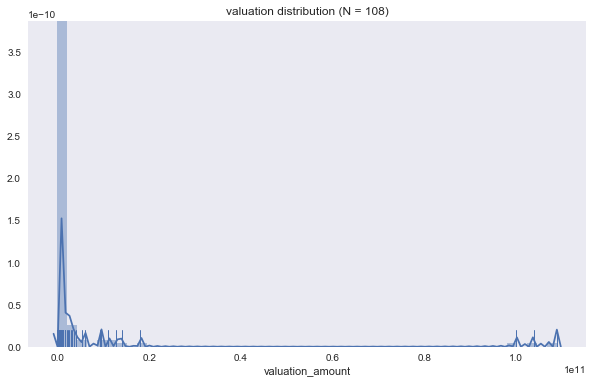

In [214]:
# plot valuation distribution; include number of companies considering
val = pd.to_numeric(offices_ipos[~offices_ipos.valuation_amount.isnull()].valuation_amount)
a=sns.distplot(val, rug=True);
a.set_title('valuation distribution (N = ' + str(len(val)) + ')');

In [215]:
val.describe()

count    1.080000e+02
mean     4.205760e+09
std      1.727186e+10
min      3.860000e+04
25%      9.737500e+07
50%      3.175000e+08
75%      1.025938e+09
max      1.089600e+11
Name: valuation_amount, dtype: float64

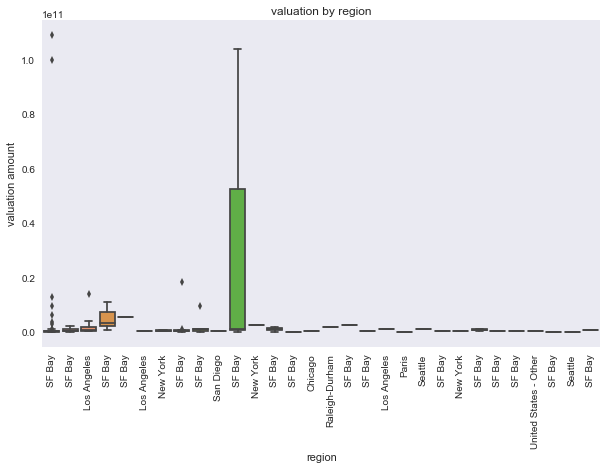

In [259]:
# look at valuation by region
region = offices_ipos[~offices_ipos.valuation_amount.isnull()].region
df_region_val = pd.concat([region, val], axis=1)
a=sns.boxplot(df_region_val.region, df_region_val.valuation_amount)

#reg = df_region_val.groupby(['region'])
#reg.mean().valuation_amount
#a=sns.boxplot(reg.mean().valuation_amount.index, reg.mean().valuation_amount) #ci=None);

#a=sns.boxplot(df_region_val.region, df_region_val.valuation_amount) #ci=None);
a.set_ylabel('valuation amount')
a.set_title('valuation by region')
a.set_xticklabels(labels=df_region_val.region, rotation=90);

TypeError: unsupported operand type(s) for /: 'str' and 'int'

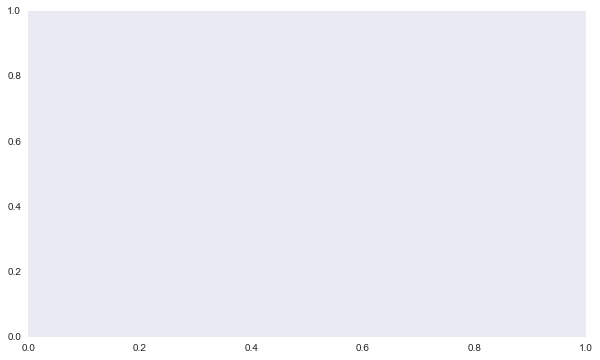

In [261]:
# plot number of ipos by region
a=sns.distplot(region)

In [153]:
reg = df.groupby(['region'])

In [229]:
reg.mean().valuation_amount

region
Baghdad                   3.140000e+08
Bangalore                 4.500000e+08
Berlin                    8.000000e+07
Boston                    9.420000e+08
Brussel                   2.550000e+09
Chicago                   5.440000e+09
China - Other             2.100000e+08
Dallas                    3.499158e+10
Finland - Other           1.000000e+09
Helsinki                  1.100320e+07
Israel - Other            2.230000e+08
London                    3.127184e+08
Los Angeles               6.273278e+08
New York                  2.598906e+09
New York - Other          2.320000e+08
Or Yehuda                 1.641000e+09
Palm Beach                7.500000e+08
Paris                     4.447500e+08
Raleigh-Durham            1.340000e+08
Rosh Ha'ayin              1.000000e+09
SF Bay                    5.979781e+09
San Diego                 4.973923e+09
Santa Barbara             2.300000e+09
Santo Domingo Este        1.740000e+08
Seattle                   2.595469e+09
Toronto           

In [238]:
reg.mean().valuation_amount.index.map(str)

Index(['Baghdad', 'Bangalore', 'Berlin', 'Boston', 'Brussel', 'Chicago',
       'China - Other', 'Dallas', 'Finland - Other', 'Helsinki',
       'Israel - Other', 'London', 'Los Angeles', 'New York',
       'New York - Other', 'Or Yehuda', 'Palm Beach', 'Paris',
       'Raleigh-Durham', 'Rosh Ha'ayin', 'SF Bay', 'San Diego',
       'Santa Barbara', 'Santo Domingo Este', 'Seattle', 'Toronto',
       'United Kingdom - Other', 'United States - Other', 'Venice',
       'Wellington'],
      dtype='object', name='region')

In [268]:
d = reg.count()
d.sort_values(by='valuation_amount', ascending=False)

,valuation_amount
region,
SF Bay,42
Los Angeles,9
Seattle,8
New York,8
United States - Other,6
Boston,4
Dallas,3
San Diego,3
Paris,2


In [204]:
# plot number of ipos by year with different color for each region
dt = pd.to_datetime(offices_ipos.public_at)
d=[]
for item in dt:
    d.append(item.year)
d.remove('nan')
sns.distplot(d)
#.str.split('-').tolist()

sns.swarmplot(x='year', y='num_ipos', data=all)

ValueError: list.remove(x): x not in list